# Problem 1 - Study response to an event.

### Loading the required libraries for using the map of The United States.

In [2]:
library(ggmap)
library(maptools)
library(maps)
library(twitteR)
library(stringr)
library(ggplot2)

### Setting the required credentials for twitter API Authentication 

In [3]:
#Enter your own consumer_key, consumer_secret, access_token and access token secret
setup_twitter_oauth(consumer_key, consumer_secret, access_token=NULL, access_secret=NULL)

[1] "Using direct authentication"


### Change the input search string below

In [4]:
line <- "Japan"

### Fetching some tweets using twitterSearch API

In [5]:
total_tweets <- NULL

tweets_list = searchTwitter(line, n = 500) 
tweets_list <- twListToDF(tweets_list)
total_tweets <- rbind(tweets_list, total_tweets) 

### Displaying some information in tweets in a data frame

In [6]:
head(total_tweets)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @ShaahYaan777: #Japan just misses out on a historic quarterfinal appearance after #NacerChadli scores in the last moment of stoppage tim…,FALSE,0,NA,2018-07-03 01:21:28,FALSE,NA,1013955853613961218,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",LilchrisXX17,23,TRUE,FALSE,NA,NA
RT @marcusgilmer: Japan over Belgium would be bonkers omg #WorldCup https://t.co/8WOZkzUwoE,FALSE,0,NA,2018-07-03 01:21:27,FALSE,NA,1013955850296324102,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",yveslavoieMTL,1,TRUE,FALSE,NA,NA
"RT @__jim_in: [#JimInTrends] 180627-0630 180627 Jimin trended for 1 hr in Japan Twitter’s Most Mentioned Artists Chart, and peaked at #17.…",FALSE,0,NA,2018-07-03 01:21:27,FALSE,NA,1013955849587286016,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MissCypher_,46,TRUE,FALSE,NA,NA
RT @PIeaseSir: Which afro destroyed Japan better? https://t.co/M91dbPvnuJ,FALSE,0,NA,2018-07-03 01:21:27,FALSE,NA,1013955849029423104,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",ImannAzimm,2277,TRUE,FALSE,NA,NA
"RT @billboard: Japan's ""Scary Beauty"" android opera is a metaphor for our relationship with tech https://t.co/BvdVhWyMsC https://t.co/6tvUv…",FALSE,0,NA,2018-07-03 01:21:27,FALSE,NA,1013955847225872385,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",azzad_aziz,23,TRUE,FALSE,NA,NA
RT @SquawkaNews: Not even a last-minute defeat will stop Japan fans from making the World Cup a cleaner place. ✊ https://t.co/uU0sw4MNz6,FALSE,0,NA,2018-07-03 01:21:26,FALSE,NA,1013955846856818689,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",arazahe,1215,TRUE,FALSE,NA,NA


### Fetching user information from tweets

In [7]:
users <- lookupUsers(total_tweets$screenName)
users_df <- twListToDF(users)

In [8]:
geo_location_list <- (users_df[, 'location'])

In [9]:
#From Screen names get user info and convert into dataframe
data_frame = as.data.frame(geo_location_list)

In [10]:
location <- data_frame[!(is.na(data_frame$geo_location_list) | data_frame$geo_location_list == ""), ]
location_df = as.data.frame(location)
head(location_df,5)

location
St-Henri Montréal
When I'm with 방탄 I'm in Utopia
"Hawaii, USA"
Malaysia
"Lancaster, PA"


In [11]:
#remove all non graphical characters from the location text
location_df$location = str_replace_all(location_df$location,"[^[:graph:]]", " ") 

### Getting location coodinates (lat/lon) information of users who have tweeted about the search query

In [12]:
location <- na.omit(geocode(as.vector(location_df$location)))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St-Henri%20Montr%C3%A9al&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=When%20I'm%20with%20%EB%B0%A9%ED%83%84%20I'm%20in%20Utopia&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "When I'm with 방탄 I'm in Utopia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hawaii,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malaysia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lancaster,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Planet%20RetroGaming&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UNAL,%20Bogot%C3%A1&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sp

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BDSad%20times%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "��Sad times��"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Busan,%20Korea&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Uhm%20lemmi%20check..&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Uhm lemmi check.."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vizianagaram,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E6%B2%96%E7%B8%84&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Patna,%20India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Patna, India"”Information from URL : http://ma

“geocode failed with status ZERO_RESULTS, location = "Here I am"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paterson,%20NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=TWITTRTH&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "TWITTRTH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E0%A4%AA%E0%A5%8B%E0%A4%96%E0%A4%B0%E0%A4%BE,%E0%A4%B6%E0%A4%BF%E0%A4%B6%E0%A5%81%E0%A4%B5%E0%A4%BE%20%E0%A5%A8%E0%A5%AF&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kota%20kinabalu&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "��"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manchester,%20England&sensor=false
.Information f

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "跟瑜洲一起慢慢走����"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kluang,johor&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E5%8D%83%E8%91%89%20%E6%9D%BE%E6%88%B8%E5%B8%82&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E8%8C%A8%E5%9F%8E%E7%9C%8C%E3%81%A4%E3%81%8F%E3%81%B0%E5%B8%82&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jakarta%20Capital%20Region&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C2%ABManila,%20Philippines%C2%BB&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E9%96%A2%E6%9D%B1%E5%A4%A7%E7%A0%82%E6%BC%A0&sensor=false
Warning

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Aulnay-sous-bois&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malaysia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malaysia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hampton,%20VA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cubao,%20Quezon%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E5%B2%A9%E6%89%8B%E7%9C%8C%E4%B8%80%E9%96%A2%E5%B8%82&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gotham,%20Central%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jax%20F

### Saving location information of tweets in external file

In [13]:
write.table(location, file="mylocdata.csv", sep=",", row.names=FALSE)

### Code for reading tweets location from external file just saved

In [14]:
from_db3 <- read.csv(file = "mylocdata.csv", header=TRUE, sep="," , row.names = NULL)
head(from_db3)

lon,lat
-73.58423,45.476777
-157.86157,21.315543
101.97577,4.210484
-76.30551,40.037875
-86.42297,32.459522
-74.08405,4.638194


### Setting up data frame with longitude, latitude and frequency information for input search term
#### Grouping of locations(lat/lon)

In [15]:
res <- data.frame()
res
vec <- c()
i <- 1
k <- 1
for (coord in location$lon){
  inty <- as.integer(coord)
    
  if (!is.element(inty,vec)){
      latInt <- as.integer(location[k,2])
      if(latInt <= 71 && latInt >= 18 && inty <= -66 && inty >= -172){
          vec <- append(vec,c(inty))
          res[i,1] <- coord
          res[i,2] <- location[k,2]
          res[i,3] <- 1
          i <- i + 1
      }
      
  } else {
      j <- match(inty,vec)
      res[j,3] <- res[j,3] + 1
  }
 k <- k + 1
}
names(res) <- c("lon", "lat", "freq")

visit.x <- res$lon
visit.y <- res$lat
visit.freq <- res$freq

<0 x 0 matrix>

### Method-1 :: Visualizing tweets density by locations for custom input search from user on United States map

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=united+states&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20states&sensor=false
Warning message:
“Removed 3 rows containing missing values (geom_point).”

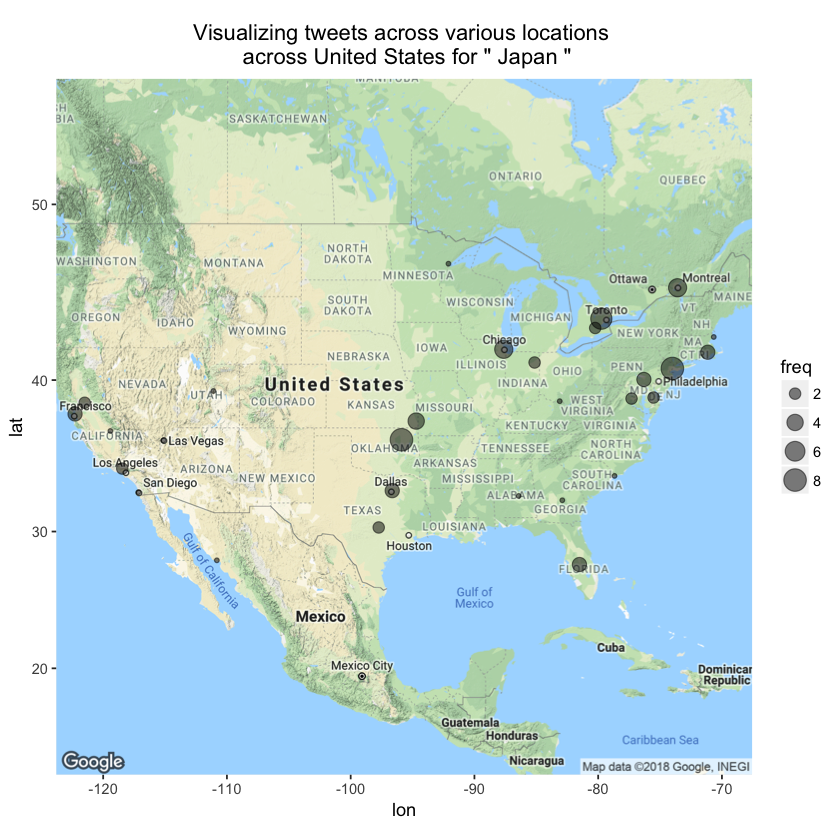

In [16]:
map <- get_map(location='united states', zoom = 4, maptype = "terrain", source = 'google', color = 'color')

mapPoints <- ggmap(map) + geom_point(aes(x = lon, y = lat, size = freq), data = res, alpha = .5) + ggtitle(paste("Visualizing tweets across various locations \n across United States for \"", line, "\"")) + theme(plot.title = element_text(hjust = 0.5))

mapPoints

### Method-2 :: Visualizing tweets density by locations for custom input search from user on United States map

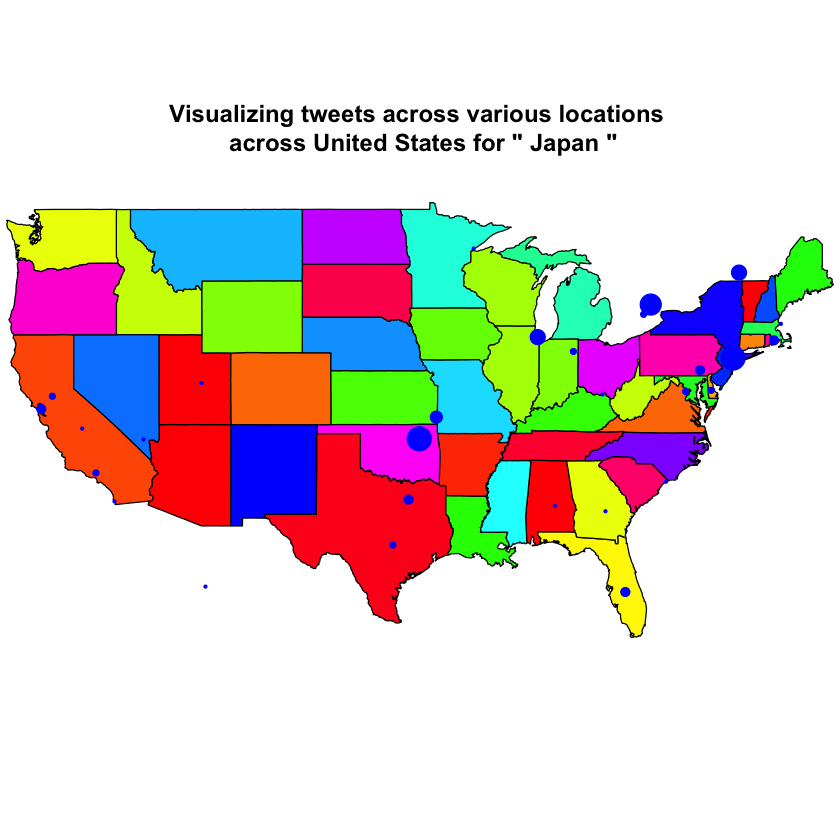

In [17]:
map("state", fill=TRUE, col=rainbow(50), bg="white", interior = TRUE, mar=c(0,0,0,0))
points(visit.x,visit.y, col="blue", pch=20, cex = visit.freq/2)
tl = paste("Visualizing tweets across various locations \n across United States for \"", line, "\"")
title(tl, line = 2)

## Reference::

1.  How to remove NA's or missing data from data frame in R  
    http://stackoverflow.com/questions/4862178/remove-rows-with-nas-missing-values-in-data-frame   
    
2.  How to use Maps for Visualization   
    http://www.cse.buffalo.edu/~bina/cse487/spring2017/Lectures/RonJupyter.docx  
    
3. J. Gentry. TwitteR Vignette: A Twitter Client for R. http://geoffjentry.hexdump.org/twitteR.pdf, last viewed 2017.

4. http://www.milanor.net/blog/maps-in-r-plotting-data-points-on-a-map/

Link to [Problem2](Problem2.ipynb)  
Link to [Part1-RVignette](Part1-RVignette.ipynb)